In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import cv2 as c

## Steps

1. Save the simulated figure with no of triangles and squares given. Also if experiment type is feature search then all the shapes should be of same color and if the experiment type is conjunction search then some of them should be red and some should be blue for simplicity take both of them equal.

2. After that you should apply some algorithm to extract out all the image frame using some algorithm. Pawan told to use the fact that centroids are known. Let's see what to do.

3. This step is simple to apply gabor filter and corner detector on each frame and predict the result.

In [2]:
#total number of triangles and Squares
TRIANGLES = 4
SQUARES = 1
#total no of objects
SIZE = TRIANGLES + SQUARES
#Experiment type
FEATURE = 'feature'
CONJUNCTION = 'conjunction'
#Marker size
#change only if you want to chnage the marker size
MARKER_SIZE = 500
SEED = 1

In [3]:
#experiment type represent whether to use feature search where only one feature will be present such as shape or
#to use conjunction search where both color and shape will be present
#if nothing specified 
def generate_plot(TRIANGLES, SQUARES, experiment_type = 'feature'):
    np.random.seed(SEED)
    #plot  size
    fig=plt.figure(figsize=(7.5, 5), dpi= 80, facecolor='w', edgecolor='k')
    
    #generating co-ordinates uniformly
    a = np.random.uniform(-2, 2, SIZE).reshape(-1, 1)
    b = np.random.uniform(-2, 2, SIZE).reshape(-1, 1)
    #co-ordinates
    cord = np.concatenate((a,b), axis = 1)
    
    if experiment_type == 'feature':
        #marker ^ represents triangle and s represents square
        plt.scatter(cord[0:TRIANGLES, 0], cord[0:TRIANGLES, 1], marker='^', s =MARKER_SIZE, c = 'g')
        plt.scatter(cord[TRIANGLES: SIZE, 0], cord[TRIANGLES:SIZE, 1], marker='s', s =MARKER_SIZE, c = 'g')
        plt.xlim([-2.5, 2.5])
        plt.ylim([-2.5, 2.5])
        plt.axis('off')
        plt.savefig('simulation-feature.jpg')
    else:
        for i in range(SIZE):
            #plotting triangles
            if i < TRIANGLES:
                #randomly deciding colors, half time red and half time blue
                if np.random.uniform()<0.5:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='^', s =MARKER_SIZE, c = 'r')
                else:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='^', s =MARKER_SIZE, c = 'b')
            #plotting squares
            else:
                if np.random.uniform()<0.5:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='s', s =MARKER_SIZE, c = 'r')
                else:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='s', s =MARKER_SIZE, c = 'b')
        plt.xlim([-2.5, 2.5])
        plt.ylim([-2.5, 2.5])
        plt.axis('off')
        plt.savefig('simulation-conjunction.jpg')

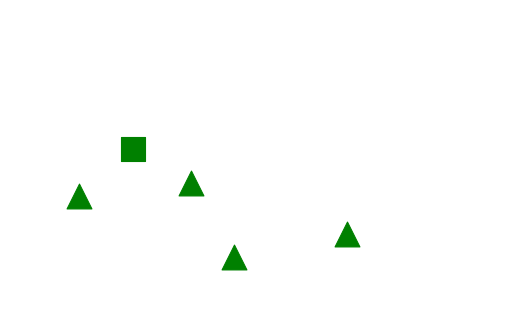

In [4]:
generate_plot(TRIANGLES, SQUARES, 'feature')

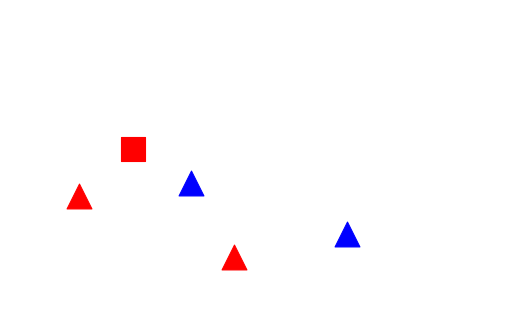

In [5]:
generate_plot(TRIANGLES, SQUARES, 'conjunction')

## Step-2: Finding contours of the image

1. Contours of the image is extracted by first thresholding the image and then finding the contours. Image with contours is also plotted. 

2. Extract out the bounding boxes, save each frame in separate folder and apply gabor filter and harris corner detector.

References of documentation:

1. Contours: https://docs.opencv.org/3.0.0/d4/d73/tutorial_py_contours_begin.html
2. Thresholding: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
3. Contours, moments, area of a polygon, centroid, bounding box: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html

In [6]:
def extract_boxes(img_col, i, experiment_type):
    x,y,w,h = cv2.boundingRect(contours[i])
    #img = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,255,0),2)
    im2 = img_col[y:y+h, x:x+w]
    plt.imshow(im2[:, :, ::-1])
    plt.axis('off')
    plt.savefig('size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg')

### Bounding box for feature search

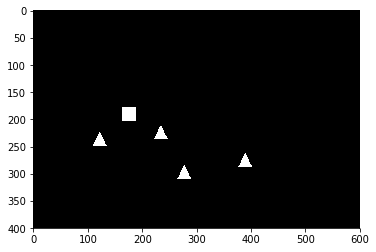

In [7]:
img = cv2.imread('simulation-feature.jpg', 0)
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

#finding contours on the threshold image
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
#loading colored image
img_col = cv2.imread('simulation-feature.jpg')

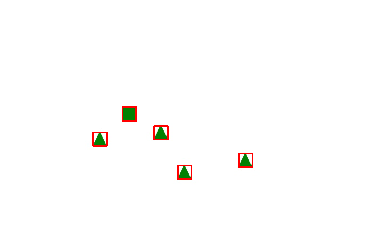

In [9]:
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    extract_boxes(img_col, i, CONJUNCTION)
    img2 = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(img2[:, :,::-1], cmap = 'gray')
plt.axis('off')
plt.savefig('bounding-box-feature.jpg')

### Bounding box for conjunction search

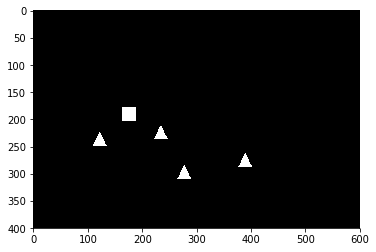

In [10]:
img = cv2.imread('simulation-conjunction.jpg', 0)
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

#finding contours on the threshold image
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
def extract_boxes(img_col, i, experiment_type):
    x,y,w,h = cv2.boundingRect(contours[i])
    #img = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,255,0),2)
    im2 = img_col[y:y+h, x:x+w]
    plt.imshow(im2[:, :, ::-1])
    plt.axis('off')
    plt.savefig('size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg')

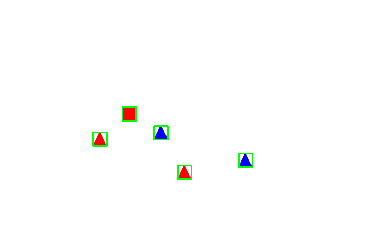

In [12]:
img_col = cv2.imread('simulation-conjunction.jpg')

for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    extract_boxes(img_col, i, FEATURE)
    img2 = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img2[:, :,::-1], cmap = 'gray')
plt.axis('off')
plt.savefig('bounding-box-conjunction.jpg')